<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# <center><b>Analysis on Online Retail Dataset<b></center>

In [ ]:
'''EDA
(4'. Sec Data Acq)
1. Introduction - just enough - 3 paras + 3 images.
2. Problem statement - Objective (mathematical) - measurable MIN/MAX
3. import libs/ system ready/excel - logistics
4. Data Acq - primary and sec
5. Pre profiling - check if there are any issues
 - outlier - BOXplot, describe
 - duplicates - .duplicated()
 - misssing values - .info()
 - inconstancy in dtypes - know what the type should be, info can see what it actually is.
 - typos - check for value_counts() or unique()
 - format - check by unique
6. pre processing
 - outlier - drop - dependent of the objective - contextual
 - duplicates - .drop_duplicates() - contextual
 - misssing values - fillna(mean/median/mode) or delete the row/column.
 - inconstancy in dtypes - .astype()
 - typos - replace
 - format - replace
 7. Post profiling - trust but verify
 8. EDA - asking relevatn qss - 15 +-5.
 9. Conclude - Action - PREP - point reason example point.

'''

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Recently, it has been recognized that **precision marketing** has become a key means of generating profit.

- The availability of customer data and transaction records provides better understanding of customers’ **buying behaviors** and **preferences**.

- In the increasingly **competitive environment**, enterprises have to create a decision-making model for precision marketing.

<center><img width=50% src="https://image.freepik.com/free-vector/digital-marketing-advertising-infographic-white-background_18591-6516.jpg"></center>

- The case study considers a **marketing problem** where an online retailer provides different all-occasion gift products.

- This case study demonstrates that our **proposed decisions** and insights are capable of providing a good **precision marketing strategy**.

- The real-world data from a company in UK were collected and used in this case study to illustrate how to implement EDA.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The E-Shop** is an online retail company based in the **United Kingdom** (UK) that sells **unique all-occasion gifts**.

- They track online **traffic** on their website from **several countries** along with the UK on daily basis.

- In 2011, they observed a **hike in online traffic** at their e-retail shop.

- They plan to <font color="red">**segment customers**</font> and <font color="red">**target**</font> them with <font color="red">**advertisements**</font> based on their past purchases.

- They have hired a data scientist to guide them with the task. Let's say you are the data scientist they have approached.

- You have to analyze their **transactional data** from December 2010 to December 2011.

- You have to present an **initial investigation** on this data to check for various patterns, unusual transactions, cancellations, and bulk orders.

- This would be a **leading step** to help the company form proper customer segments.



---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                         # A package that is required by pandas-profiling library
!pip install -q pandas-profiling                                    # A library to generate basic statistics about data

     |████████████████████████████████| 71kB 6.3MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure **not to execute** the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 256kB 27.2MB/s 
     |████████████████████████████████| 3.1MB 31.9MB/s 
     |████████████████████████████████| 1.1MB 36.7MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 112kB 41.1MB/s 
     |████████████████████████████████| 645kB 33.8MB/s 
     |████████████████████████████████| 10.1MB 32.8MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 296kB 53.2MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.


<a name = Section33></a>
### **3.3 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)

#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of information about the customers, transactions, and products of an online retail site.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 541909 | 8 | 22.6 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| InvoiceNo | A 6-digit number uniquely assigned to each transaction. 'C' in the beginning indicates a Cancellation |
|2|StockCode | Product Code, a 5-digit number uniquely assigned to each distinct product |
|3| Description |	Product (item) Name |
|4| Quantity |	The quantities of each product (item) per transaction |
|5| InvoiceDate |	The day and time when each transaction was generated |
|6| UnitPrice |	Product price per unit in Sterling |
|7| CustomerID |	A 5-digit number uniquely assigned to each customer |
|8| Country |	The name of the country where each customer resides |

In [3]:
data = pd.read_excel(io='https://github.com/insaid2018/Term-1/blob/master/Data/Casestudy/online_retail.xlsx?raw=true')
print('Shape of the dataset:', data.shape)
data.head()

Shape of the dataset: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
'''
1. missing values in Description - delete the column
2. cust id - float - type casting to object
3. cust id missing - replace with ('guest') #every guest just visits onces
'''

"\n1. missing values in Description - delete the column\n2. cust id - float - type casting to object\n3. cust id missing - replace with ('guest' + invoice_no) #every guest just visits onces\n"

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
'''
1. Quantity - there are outliers, we can study their validity.
2. unit price - negative - study, absolute value.
3. unit price - outliers - study, drop is needed.
'''

In [6]:
# 1.missng value in description
# delete

data.drop('Description', axis = 1, inplace = True)

In [7]:
data['CustomerID'] = data['CustomerID'].fillna(0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   541909 non-null  float64       
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [9]:
# 2. cust id - float - type casting to object

data['CustomerID'] = data['CustomerID'].astype(int).astype('str')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   541909 non-null  object        
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


In [10]:
data['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [11]:
'deepsh' + 'wadhwani'

'deepshwadhwani'

In [41]:
#'guest_' + data['InvoiceNo'].astype('str')

0         guest_536365
1         guest_536365
2         guest_536365
3         guest_536365
4         guest_536365
              ...     
541904    guest_581587
541905    guest_581587
541906    guest_581587
541907    guest_581587
541908    guest_581587
Name: InvoiceNo, Length: 541909, dtype: object

In [56]:
#data[data['CustomerID']==0]['CustomerID'] = 'guest_' + data[data['CustomerID']==0]['InvoiceNo'].astype('str')

In [57]:
#data[data['CustomerID'].str[0]=='g']

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [12]:
data['CustomerID'].sort_values()

437603        0.0
261044        0.0
261045        0.0
261046        0.0
261047        0.0
           ...   
198739    18287.0
198738    18287.0
198737    18287.0
198743    18287.0
392725    18287.0
Name: CustomerID, Length: 541909, dtype: float64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   541909 non-null  object        
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


In [11]:
# 4. Quantity - there are outliers, we can study their validity.

data['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [12]:
IQR = data.Quantity.describe()['75%'] - data.Quantity.describe()['25%']

low_range = data.Quantity.describe()['25%'] - 1.5*IQR
high_range = data.Quantity.describe()['75%'] + 1.5*IQR

print('Low range  : {} '.format(low_range))
print('High range : {} '.format(high_range))


Low range  : -12.5 
High range : 23.5 


In [13]:
data = data[(data['Quantity']< 5000) | (data['Quantity']> -5000)]


In [ ]:
'''
7. a new feature can be created = returned / expired / outgo
8. duplicates
'''

In [ ]:
data['CustomerID'] = 'Gust_'.map(str) + data['InvoiceNo'].map(str)


**Observations:**

- We can see the description of only three continuous features - **Quantity**,	**UnitPrice**, and	**CustomerID**.

- The Quantity feature ranges from **-80995 to 80995 units** per transaction.

- The **midspread** (middle 50%) of the feature ranges from **1 unit** to **10 units** per transaction.

- The **UnitPrice** feature ranges from **-11062.06 to 38970 Sterling**. We will have to deal with the **negative price values**.

- The **midspread** (middle 50%) of the feature ranges from **1.25 Sterling to 4.13 Sterling**. 

- Looking at the maximum value of the feature, we can see that either some products are **priced very high** or it may be misinformation.

- **CustomerID** feature is an **identifier** so we won't be making any statistical observations for it. 

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   541909 non-null  float64       
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 33.1+ MB


**Observations:**

- There are **8 features** with **5,41,908 observations**.

- **Quantity** is of **int64** datatype.

- **UnitPrice** and **CustomerID** are of **float64** datatype.

- **InvoiceDate** is of **datetime64[ns]** datatype.

- **InvoiceNo**, **StockCode**, **Description**, and **Country** are of **object** datatypes

- We will have to make more sense of InvoiceNo and StockCode by exploring them further.

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [16]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

- There are **8 features** with **5,41,909 observations** in the dataset.

- **1,36,534 (3.1%) cells** have **missing** values.

- Most of the missing values are from the **CustomerID** feature and the rest belong to the **Description** feature.

- **CustomerID** feature has **24.9% of cells missing**.

- Dataset has **76,627 (14.1%) duplicate rows**.

- **Country** and **CustomerID** are highly **correlated** to each other.

- The **UnitPrice** feature is **positively skewed**.

- It also contains **2 negative values** and **2515 (0.5%) zeros**.

- InvoiceNo, StockCode, and Description seem to have unsupported data types.

- The dataset has **4372 unique customers** and **3684 unique products**.

- The **UK** has the **highest amount of customers** followed by Germany, France, and 34 more countries.

<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- We will simply **drop** the **rows** that contain **missing** values.

- We will also extract **year**, **month**, **hour** and **day of the week** of the transactions.

In [14]:
# We will start by first removing the duplicate rows
data.drop_duplicates(inplace=True)

# Dropping rows containing missing values
data.dropna(inplace=True)

# Checking for missing values again
data.isna().sum()

# Extracting Year, Month, Day and Hour for every transaction
data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['hour'] = data['InvoiceDate'].dt.hour

# We get Monday = 0 to Sunday = 6 when we convert to day of the week.
# We will add +1 to every day of week so we can get Monday = 1 to Sunday = 7
data['day'] = (data['InvoiceDate'].dt.dayofweek) + 1

data["Revenue"] = data["Quantity"] * data["UnitPrice"]

data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,8,3,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8,3,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,8,3,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8,3,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8,3,20.34


<a name = Section7></a>

---
# **7. Data Post-Profiling**
---

- In this section, we will observe the changes after performing data pre-processing, if present.

In [ ]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Post Profiling Report.html')
# print('Accomplished!')

**Observations**:

- There are **no missing values** in the dataset.

- There are **no duplicate values** in the dataset.

- **Description** feature shows **high cardinality**.

<a name = Section8></a>

---
# **8. Exploratory Data Analysis**
---

In [18]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,3,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,3,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34


In [ ]:
'''
15+-5 relevant questions

asking question is not easy:
1. Relevence
2. Reasonable answering the question. - RESONABLY 
3. Vague while asking question. - SPECIFIC
'''

In [ ]:
'''
UNI - BI - MULTI strategy (n columns)

UNI - one variable at a time -  n questions

BI - two variables at a time - nC2 = (n2-n)/2

MULTI - > two variable at a time - 2n - 1 - n - (n2-n)/2
--------------------------------------------------------------
TOTAL -                           nC1 + nC2 ... + nCn = (2n - 1)



'''

### Write your 5 questions here:

#### My Q 1. Which are the top 10 items by the revenue they drew for the company?


In [15]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'year', 'month', 'hour', 'day', 'Revenue'],
      dtype='object')

In [ ]:
'''
these columns are important for me:
    1. 'StockCode' - categorical
    2. 'Revenue' - continous
    
'''

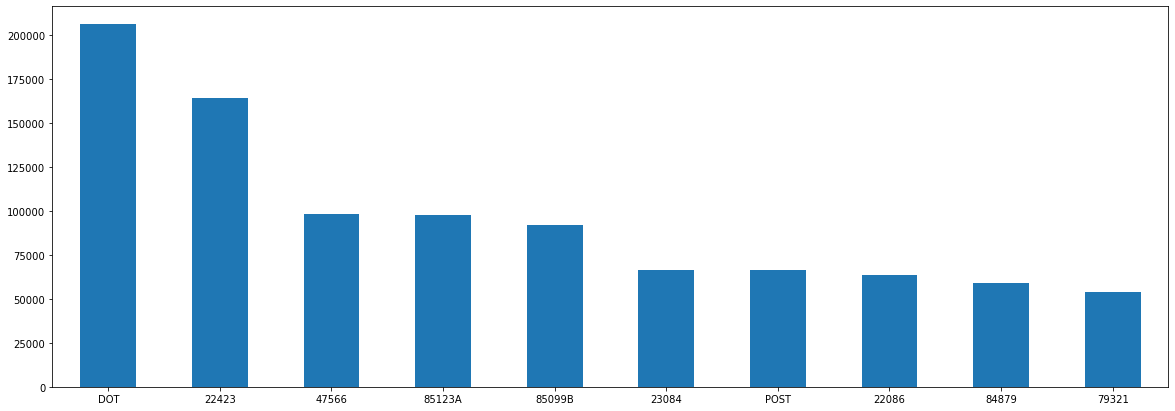

In [26]:
S = data.groupby(by = 'StockCode')['Revenue'].sum()

paper = plt.figure(figsize = (20,7))
S[S>0].sort_values(ascending = False)[:10].plot.bar()
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 0)
plt.title('')
plt.show()

<AxesSubplot:ylabel='Frequency'>

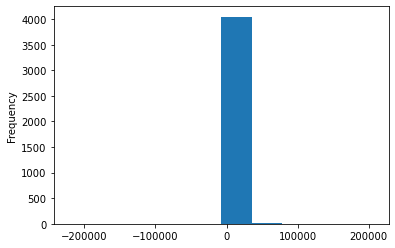

In [17]:
data.groupby(by = 'StockCode')['Revenue'].sum().plot.hist()

####  My Q 2. What is the Sales revenue for the last quarter in various countries?

In [27]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'year', 'month', 'hour', 'day', 'Revenue'],
      dtype='object')

In [ ]:
'''
1. 'Country' - categorical
2. 'Revenue' - continous
3. 'year', 'month' - how to shortlist
'''

In [28]:
data['year'].value_counts()

2011    494658
2010     41981
Name: year, dtype: int64

In [30]:
data['month'].value_counts().sort_index()

1     34900
2     27479
3     36439
4     29701
5     36781
6     36609
7     39267
8     35064
9     49861
10    59969
11    83342
12    67227
Name: month, dtype: int64

In [31]:
data.groupby(by = ['year','month']).count()

InvoiceNo  StockCode  Quantity  InvoiceDate  UnitPrice  \
year month                                                           
2010 12         41981      41981     41981        41981      41981   
2011 1          34900      34900     34900        34900      34900   
     2          27479      27479     27479        27479      27479   
     3          36439      36439     36439        36439      36439   
     4          29701      29701     29701        29701      29701   
     5          36781      36781     36781        36781      36781   
     6          36609      36609     36609        36609      36609   
     7          39267      39267     39267        39267      39267   
     8          35064      35064     35064        35064      35064   
     9          49861      49861     49861        49861      49861   
     10         59969      59969     59969        59969      59969   
     11         83342      83342     83342        83342      83342   
     12         25246      25246     25246        25246      25246   

            CustomerID  Country   hour    day  Revenue  
year month                                              
2010 12          41981    41981  41981  41981    41981  
2011 1           34900    34900  34900  34900    34900  
     2           27479    27479  27479  27479    27479  
     3           36439    36439  36439  36439    36439  
     4           29701    29701  29701  29701    29701  
     5           36781    36781  36781  36781    36781  
     6           36609    36609  36609  36609    36609  
     7           39267    39267  39267  39267    39267  
     8           35064    35064  35064  35064    35064  
     9           49861    49861  49861  49861    49861  
     10          59969    59969  59969  59969    59969  
     11          83342    83342  83342  83342    83342  
     12          25246    25246  25246  25246    25246

In [32]:
short = data[(data['year'] == 2011) & (data['month'] > 9)]

In [38]:
short.groupby(by = 'Country')['Revenue'].sum()['United Kingdom']

2540887.71999943

<AxesSubplot:ylabel='Revenue'>

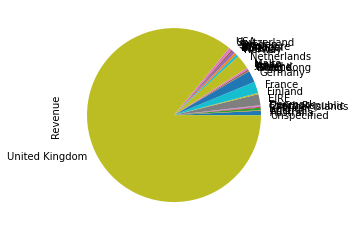

In [40]:
short.groupby(by = 'Country')['Revenue'].sum().plot.pie()

<AxesSubplot:xlabel='Country'>

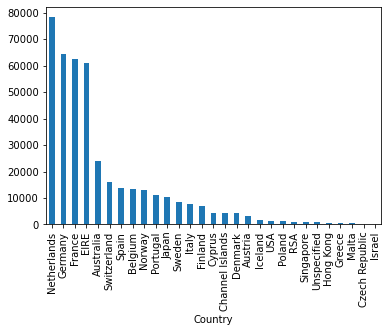

In [39]:
short.groupby(by = 'Country')['Revenue'].sum().sort_values(ascending = False)[1:].plot.bar()

#### My Q 3. Analysing change in frequency of invoicing with the calander month and hour of the day.

In [41]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'year', 'month', 'hour', 'day', 'Revenue'],
      dtype='object')

In [ ]:
'''
1. 'InvoiceNo' - CAT
2. 'month' - CAT
3. 'hour' - CAT

'''

In [46]:
MHI = pd.DataFrame(data.groupby(by = ['month', 'hour'])['InvoiceNo'].nunique()).reset_index()

In [47]:
MHI.head(1)

,month,hour,InvoiceNo
0,1,7,1


<AxesSubplot:xlabel='hour', ylabel='month'>

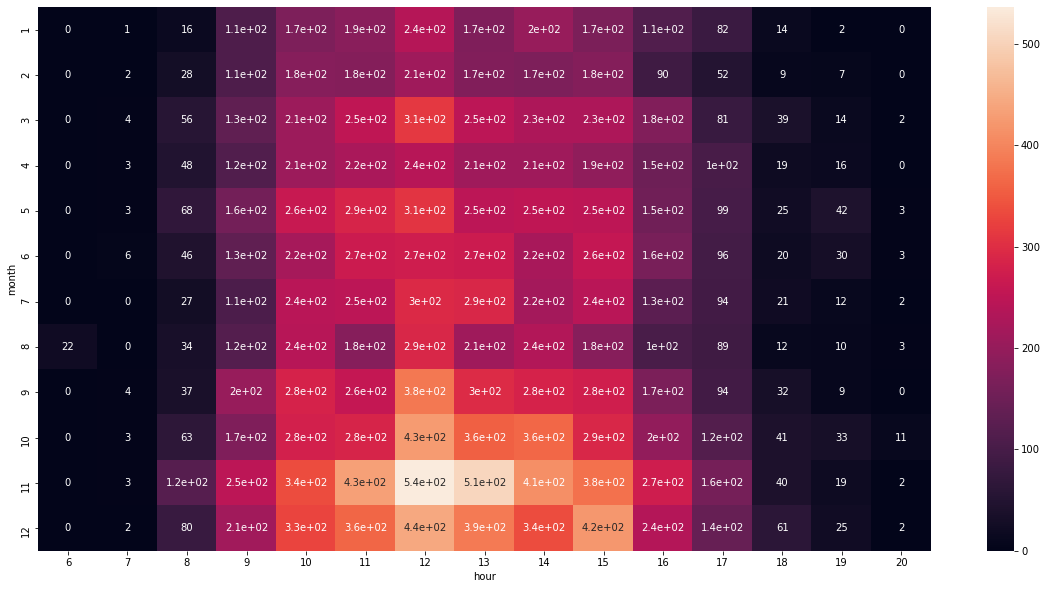

In [54]:
paper = plt.figure(figsize=(20,10))
sns.heatmap(MHI.pivot(index='month', columns='hour', values='InvoiceNo').fillna(0), annot = True)

#### My Q 4. Which are the top 10 item with highest repeat sales?

'repeat' - same cust buys same product again.

In [55]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'year', 'month', 'hour', 'day', 'Revenue'],
      dtype='object')

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905     True
541906     True
541907    False
541908    False
Length: 536639, dtype: bool

In [58]:
data['repeat'] = data[['CustomerID','StockCode']].duplicated()

In [ ]:
'''
'CustomerID'
'StockCode'
'InvoiceNo'
'''

In [59]:
short = data[data['CustomerID']!=0]

<AxesSubplot:>

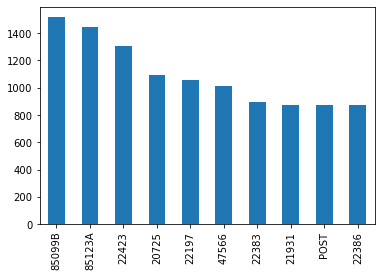

In [64]:
short[short['repeat']]['StockCode'].value_counts()[:10].plot.bar()

#### My Q 5. What is the distribution of purchase power of our customers in the 5 country?

'purchase power' - amount per invoice.

In [67]:
temp = pd.DataFrame(data.groupby(by = ['Country','CustomerID','InvoiceNo'])['Revenue'].sum()).reset_index()

In [68]:
temp

,Country,CustomerID,InvoiceNo,Revenue
0,Australia,12386,537676,258.90
1,Australia,12386,540280,143.00
2,Australia,12388,541271,431.30
3,Australia,12388,543357,124.05
4,Australia,12388,546135,210.90
...,...,...,...,...
25895,Unspecified,12743,561661,195.33
25896,Unspecified,14265,559929,252.05
25897,Unspecified,14265,564051,278.13
25898,Unspecified,16320,552695,852.68


In [72]:
temp2 = pd.DataFrame(temp.groupby(by = ['Country','CustomerID'])['Revenue'].mean()).reset_index()

In [73]:
temp2

,Country,CustomerID,Revenue
0,Australia,12386,200.950000
1,Australia,12388,463.443333
2,Australia,12393,395.650000
3,Australia,12415,4758.671154
4,Australia,12422,193.100000
...,...,...,...
4384,Unspecified,0,416.034000
4385,Unspecified,12363,276.000000
4386,Unspecified,12743,270.065000
4387,Unspecified,14265,265.090000


In [78]:
temp2['Country'].value_counts()[:5].index

Index(['United Kingdom', 'Germany', 'France', 'Spain', 'Belgium'], dtype='object')

In [86]:
temp3 = temp2[temp2['Country'].isin([ 'Germany', 'France', 'Spain', 'Belgium'])]

<AxesSubplot:xlabel='Country', ylabel='Revenue'>

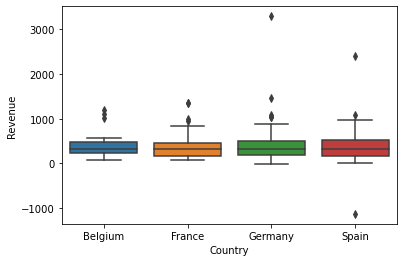

In [87]:
sns.boxplot(x="Country", y="Revenue", data=temp3)

### Questions developed by Research team, Insaid. You can practice those before the next session.

**<h4>Question:** How to cerify for cancelled transactions?</h4>

- According to Section 4, feature descreption table, a cancelled transaction can be identified if the InvoiceNo begins with a 'C'

In [ ]:
'''
Relevant - 
Reasonalble - 
Non vague - 


Q - 
'''

**<h4>Question:** Does the Quantity feature consists of negative values for cancelled orders?</h4>

**<h4>Question**: How many total orders have been made?</h4>

**<h4>Question:** What is the proportion of cancelled transactions from total number of transactions?</h4>

**<h4>Question :** What is the average number of orders placed per customer?</h4>

**Question:** What's the average number of unique items per order?

**<h4>Question:** How many products does a customer buy on an average?</h4>

**<h4>Question:** What is the total revenue generated by the online retailer?</h4>

**<h4>Question:** What is the average revenue generated per customer?</h4>

**<h4>Question:** What is the total revenue generated by each country?</h4>

**<h4>Question:** What is the total revenue generated per month?</h4>

**<h4>Question:** How many orders have been placed at each hour of a day?</h4>

**<h4>Question:** What is the frequency of orders for weekdays?</h4>

**<h4>Question:** What is the frequency of orders for weekdays vs hours per day?</h4>

**<h4>Question:** Assuming UnitPrice=0 means free items, how many free items have been given away?</h4>

**<h4>Question:** What is the average revenue per order?</h4>

**<h4>Question:** What is the total monthly revenue in UK?</h4>

**<h4>Question:** Which products are most bought in UK?</h4>

**<h4>Question:** How many customers were active in all the months in the UK?<h4>

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- We almost have **16.46% cancelled orders** which is a slightly high number for an online retailer.

- **Studying** these **cancelled orders** further may help in preventing future cancellation.

- Let's first get an overview of the general customers purchase behavior and then dig deeper.

- The average **number of unique items per order** are **17**.

- The average revenue per order is **34.39 Sterling** for the online retailer.

- Not only **most sales revenues** are achieved in the **UK**, but also **most customers** are **located** there too.

- Netherlands seems like one of the **bulk buyers** as it has **less than 100 customers** yet brings in the most amount of revenue **outside** the **UK**.

<a name = Section92></a>
### **9.2 Actionable Insights**

- By analysing the data in this way, we can uncover **groups of customers** that behave in similar ways.

- **UK**, **Germany** and **Netherlands** should be the **primary targets** for advertisments.

- This level of **customer segmentation** is useful in marketing to these groups of customers appropriately.

- A **marketing campaign** that works for a group of customers that places **low value orders** frequently may not be appropriate for customers who place sporadic, **high value orders**.

- Make relevant **product recommendations** to the customers using **precision marketing**.

- Empower your customers to actively share their details, **make your customers part of the process**.

- Encourage them to share their **data** with you through **conversations**, **surveys**, and other **research methods**.

- Doing so not only help you get to know them better, but it also **builds trust**.

- It would be important to **talk with the e-commerce team to understand the business, customers, strategic and tactical objectives**.